In [1]:
###########on githubbbb already #############

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import warnings 
data = pd.read_csv("Housing.csv")
#####Visualization
data.info()
data.head()
data.tail()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [2]:
data.dropna(inplace=True)
data = pd.get_dummies(data, columns=['ocean_proximity'])
bool_columns = ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'ocean_proximity_ISLAND']
data[bool_columns] = data[bool_columns].astype(int)

In [3]:
data.info()


corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  int64  
 3   total_rooms                 20433 non-null  int64  
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  int64  
 6   households                  20433 non-null  int64  
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  int64  
 9   ocean_proximity_<1H OCEAN   20433 non-null  int32  
 10  ocean_proximity_INLAND      20433 non-null  int32  
 11  ocean_proximity_ISLAND      20433 non-null  int32  
 12  ocean_proximity_NEAR BAY    20433 non-null  int32  
 13  ocean_proximity_NEAR OCEAN  20433 no

median_house_value            1.000000
median_income                 0.688355
ocean_proximity_<1H OCEAN     0.257614
ocean_proximity_NEAR BAY      0.160526
ocean_proximity_NEAR OCEAN    0.140378
total_rooms                   0.133294
housing_median_age            0.106432
households                    0.064894
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023525
population                   -0.025300
longitude                    -0.045398
latitude                     -0.144638
ocean_proximity_INLAND       -0.484787
Name: median_house_value, dtype: float64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR BAY'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>, <Axes: >,
        <Axes: >]], dtype=object)

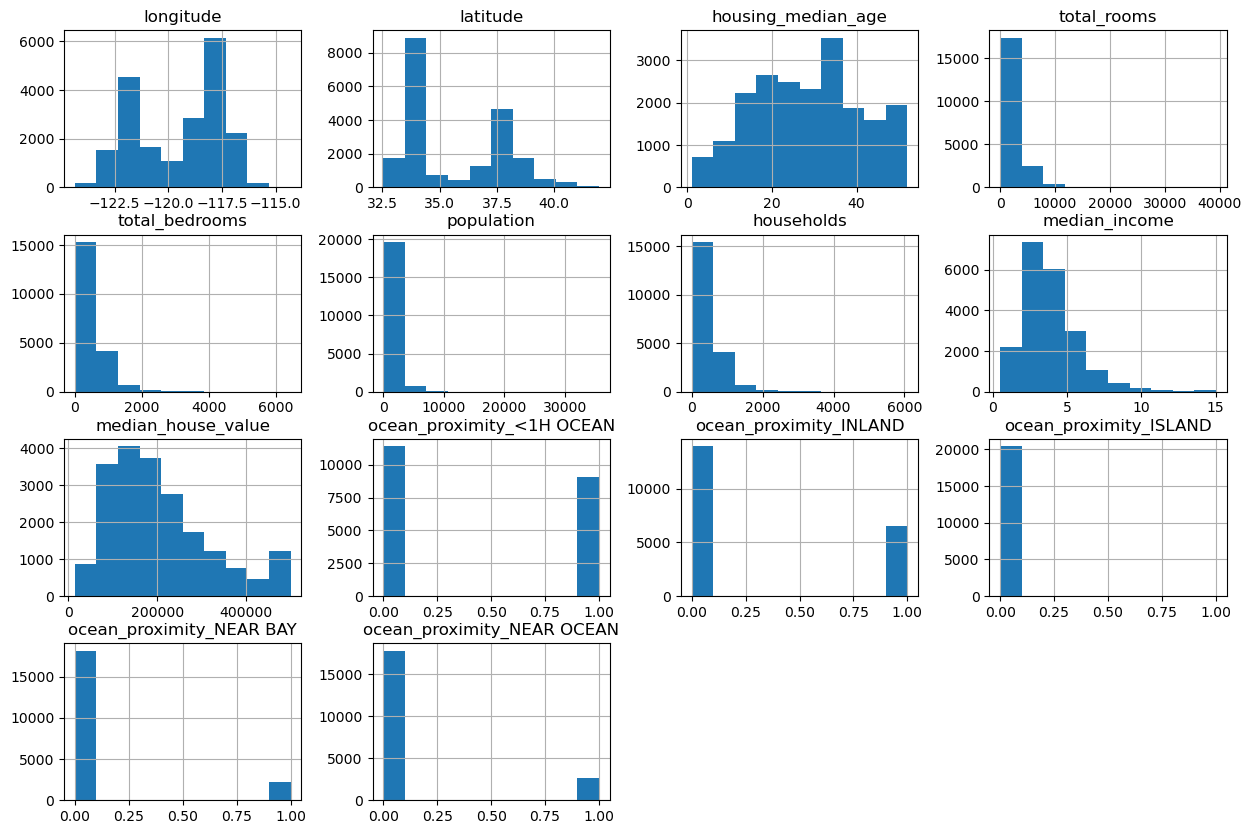

In [4]:
data.corr()
data.hist(figsize=(15, 10))

In [5]:
train_data=data.copy()


# Define a function to identify and remove outliers based on IQR
def remove_outliers(data, columns_to_remove_outliers):
    # Calculate Q1, Q3, and IQR for each column
    Q1 = data[columns_to_remove_outliers].quantile(0.25)
    Q3 = data[columns_to_remove_outliers].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers_count = {}
    
    for col in columns_to_remove_outliers:
        lower_bound = Q1[col] - 1.5 * IQR[col]
        upper_bound = Q3[col] + 1.5 * IQR[col]
        
        # Count outliers before removal
        outliers_before = len(data[data[col] < lower_bound]) + len(data[data[col] > upper_bound])
        
        # Remove outliers
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        
        # Count outliers after removal
        outliers_after = len(data[data[col] < lower_bound]) + len(data[data[col] > upper_bound])
        
        # Calculate the number of outliers removed
        outliers_removed = outliers_before - outliers_after
        
        outliers_count[col] = outliers_removed
    
    return data, outliers_count

columns_to_remove_outliers = ['total_rooms', 'total_bedrooms', 'population', 'households']

# Call the remove_outliers function
train_data, outliers_count = remove_outliers(train_data, columns_to_remove_outliers)

# Print the number of outliers removed for each column
for col, count in outliers_count.items():
    print(f"Number of outliers removed in {col}: {count}")

train_data.info()

Number of outliers removed in total_rooms: 1290
Number of outliers removed in total_bedrooms: 305
Number of outliers removed in population: 247
Number of outliers removed in households: 9
<class 'pandas.core.frame.DataFrame'>
Index: 18582 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   18582 non-null  float64
 1   latitude                    18582 non-null  float64
 2   housing_median_age          18582 non-null  int64  
 3   total_rooms                 18582 non-null  int64  
 4   total_bedrooms              18582 non-null  float64
 5   population                  18582 non-null  int64  
 6   households                  18582 non-null  int64  
 7   median_income               18582 non-null  float64
 8   median_house_value          18582 non-null  int64  
 9   ocean_proximity_<1H OCEAN   18582 non-null  int32  
 10  ocean_proximity_INL

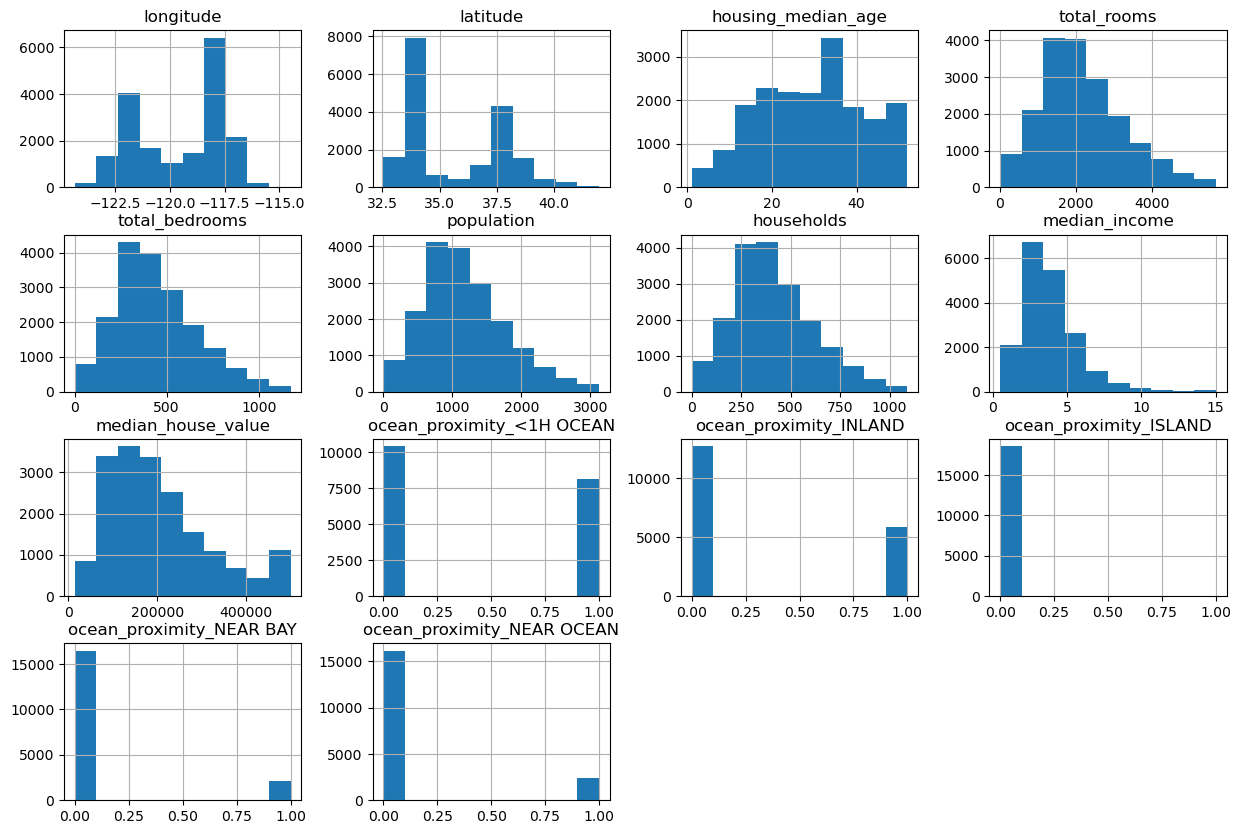

In [6]:
# Display histograms after removing outliers
train_data.hist(figsize=(15, 10))
plt.show()


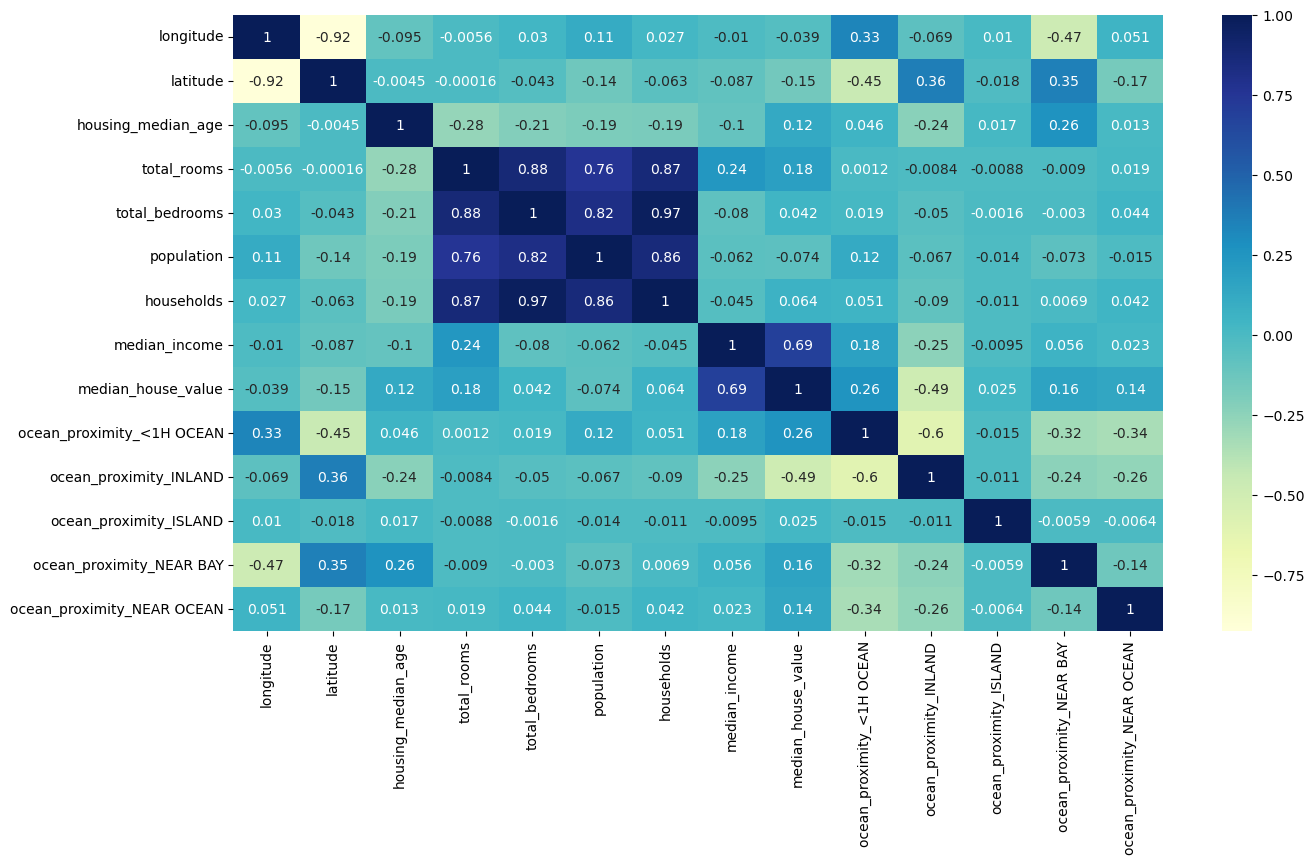

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
ocean_proximity_<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


In [7]:
# Visualize the correlation in the cleaned dataset
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()
data = data.apply(pd.to_numeric, errors='coerce')
correlation_matrix = data.corr()
correlation_matrix.T

In [8]:

# Split the cleaned data into features (X) and target variable (y)
X = train_data.drop('median_house_value', axis=1)
y = train_data['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) 
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((14865, 13), (3717, 13), (14865,), (3717,))

In [9]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Linear Regression
lineareg = LinearRegression()

# Fit the model on the training data
lineareg.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_pred_train = lineareg.predict(X_train_scaled)

# Make predictions on the test data
y_pred_test = lineareg.predict(X_test_scaled)

# Evaluate the model on the training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r_squared_train = lineareg.score(X_train_scaled, y_train)  # R-squared for training set

# Evaluate the model on the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r_squared_test = lineareg.score(X_test_scaled, y_test)  # R-squared for test set

# Display evaluation metrics
print("Training Set Metrics:")
print("R-squared Score:", r_squared_train)

print("\nTrain Set Metrics:")
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):",  mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)

print("\nTest Set Metrics:")
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared Score:", r_squared_test)

Training Set Metrics:
R-squared Score: 0.663811455138456

Train Set Metrics:
Mean Absolute Error (MAE): 48991.273756497336
Mean Squared Error (MSE): 4483054989.618424
Root Mean Squared Error (RMSE): 66955.61955219609

Test Set Metrics:
Mean Absolute Error (MAE): 49037.18881782961
Mean Squared Error (MSE): 4571763432.421956
Root Mean Squared Error (RMSE): 67614.81666337606
R-squared Score: 0.6625598943848602


In [10]:
# Display the shapes of the training and testing sets
print("Shape of X_test:", X_test_scaled .shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_test:", X_test_scaled .shape)
print("Shape of y_test_pred:", y_pred_test.shape)

Shape of X_test: (3717, 13)
Shape of y_test: (3717,)
Shape of X_test: (3717, 13)
Shape of y_test_pred: (3717,)


In [11]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred_test})
print(comparison.head(10))

       Actual      Predicted
12741  159500  163939.954054
7712   285500  193467.967214
9387   474600  340334.910779
11791  209400  208290.447119
2056    92300  129170.605682
8819   200000  218224.962117
10255  190700  216130.547666
9888   154600  177649.330265
20436  500001  534919.204786
19762   55000   48292.875409


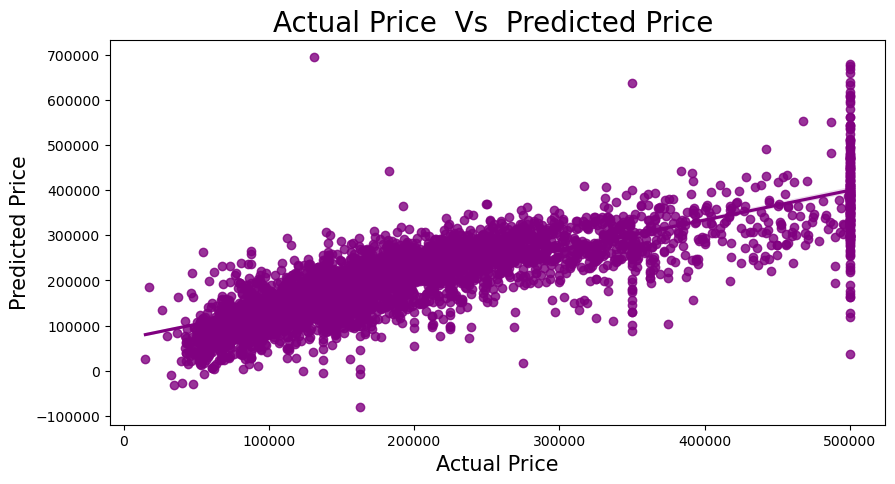

In [12]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y= y_pred_test,data=data,color='purple')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [13]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

knn_model.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred_knn = knn_model.predict(X_train_scaled )

# Make predictions on the test data
y_test_pred_knn = knn_model.predict(X_test_scaled )

# Evaluate the k-NN model on the training set
mae_train_knn = mean_absolute_error(y_train, y_train_pred_knn)
mse_train_knn = mean_squared_error(y_train, y_train_pred_knn)
rmse_train_knn = np.sqrt(mse_train_knn)
r_squared_train_knn = knn_model.score(X_train_scaled , y_train)  # R-squared for training set

# Evaluate the k-NN model on the test set
mae_test_knn = mean_absolute_error(y_test, y_test_pred_knn)
mse_test_knn = mean_squared_error(y_test, y_test_pred_knn)
rmse_test_knn = np.sqrt(mse_test_knn)
r_squared_test_knn = knn_model.score(X_test_scaled, y_test)  # R-squared for test set

# Display evaluation metrics for k-NN model
print("k-NN Training Set Metrics:")
print("R-squared Score:", r_squared_train_knn)

print("\nk-NN Test Set Metrics:")
print("Mean Absolute Error (MAE):", mae_test_knn)
print("Mean Squared Error (MSE):", mse_test_knn)
print("Root Mean Squared Error (RMSE):", rmse_test_knn)
print("R-squared Score:", r_squared_test_knn)


k-NN Training Set Metrics:
R-squared Score: 0.818052346435404

k-NN Test Set Metrics:
Mean Absolute Error (MAE): 40624.01549636804
Mean Squared Error (MSE): 3701536092.7199783
Root Mean Squared Error (RMSE): 60840.25059711686
R-squared Score: 0.726791040584534


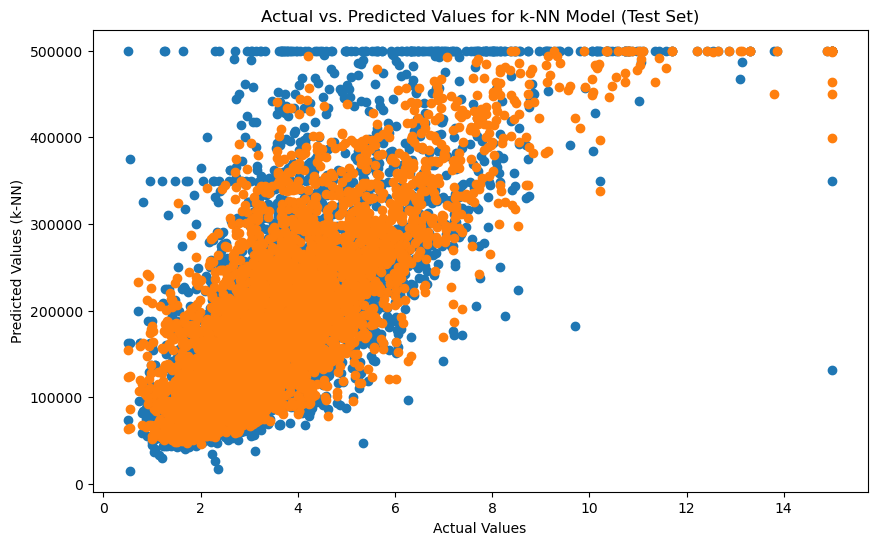

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['median_income'], y_test,label="Actual Values")
plt.scatter(X_test['median_income'], y_test_pred_knn,label="Predicited Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (k-NN)")
plt.title("Actual vs. Predicted Values for k-NN Model (Test Set)")
plt.show()

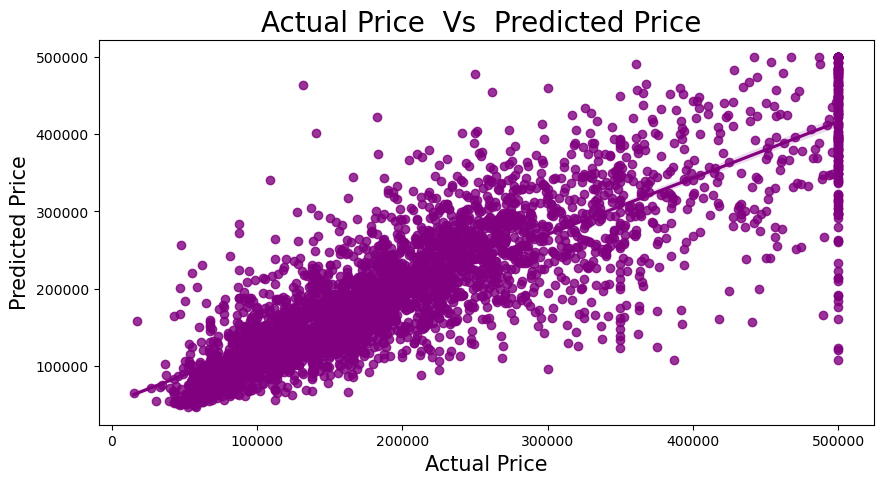

In [16]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y= y_test_pred_knn,data=data,color='purple')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [15]:
# Compare the predictions from Linear Regression and k-NN models
comparison['Predicted (k-NN)'] = y_test_pred_knn
print(comparison.head(10))


# 3. Number of Samples Used in Training and Testing
print("Number of samples in the training set:", len(X_train))
print("Number of samples in the testing set:", len(X_test))

print("Number of samples in y_train:", y_train.shape[0])
print("Number of samples in y_test:",  y_test .shape[0])
     
# 1. Total Number of Samples in the Dataset
total_samples = len(train_data)
print("Total number of samples in the dataset:", total_samples)

# 4. Number of Features and Feature Names
num_features = data.shape[1] - 1  # Subtract 1 to exclude the target variable 'median_house_value'
feature_names = X_train.columns.tolist()

print("Number of features:", num_features)
print("Feature names:", feature_names)


# 2. Size of Each Sample
sample_size = data.shape[1]  # Number of columns/features
print("Size of each sample:", sample_size)
train_data.shape

       Actual      Predicted  Predicted (k-NN)
12741  159500  163939.954054          115880.0
7712   285500  193467.967214          182500.0
9387   474600  340334.910779          254440.0
11791  209400  208290.447119          216860.0
2056    92300  129170.605682           89980.0
8819   200000  218224.962117          227560.0
10255  190700  216130.547666          236340.0
9888   154600  177649.330265          144400.0
20436  500001  534919.204786          498600.8
19762   55000   48292.875409           74500.0
Number of samples in the training set: 14865
Number of samples in the testing set: 3717
Number of samples in y_train: 14865
Number of samples in y_test: 3717
Total number of samples in the dataset: 18582
Number of features: 13
Feature names: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean

(18582, 14)